# Kasus Data Science Customer Churn (Challenge Chapter 2)

## Download Dataset yang akan dipakai

In [1]:
# download dataset yang akan digunakan
!gdown 1S6VXIDtKuN98kP0pr-PQWfvY2AxJpliS
!gdown 1lcPBOHjqtkz4xgwSdiak4CL2cLyip3AT

Downloading...
From: https://drive.google.com/uc?id=1S6VXIDtKuN98kP0pr-PQWfvY2AxJpliS
To: /content/Data Train.csv
100% 388k/388k [00:00<00:00, 73.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1lcPBOHjqtkz4xgwSdiak4CL2cLyip3AT
To: /content/Data Test.csv
100% 69.3k/69.3k [00:00<00:00, 58.6MB/s]


## Import Library dan membaca dataset yang akan digunakan



In [2]:
# import library yang akan digunakan
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [3]:
# eksport dataset yang akan digunakan
data_train = pd.read_csv('Data Train.csv')
data_test = pd.read_csv('Data Test.csv')

data_train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


Dapat dilihat dari dataset hanya terdapat data kategorikal(Data Nominal) dan Numerikal(Diskrit).
Dari dataset tersebut dapat dipahami pula tiap kolomnya yaitu:
- state
- account_length
- area_code
- international_plan
- voice_mail_plan
- number_vmail_messages
- total_day_minutes
- total_day_calls
- total_day_charge
- total_eve_minutes
- total_eve_calls
- total_eve_charge
- total_night_minutes
- total_night_calls
- total_night_charge
- total_intl_minutes
- total_intl_calls
- total_intl_charge
- number_customer_service_calls
- churn

## Melakukan Pemeriksaan dan Cleansing dataset
- tipe data tiap kolom, 
- mengkategorikan kolom menjadi kategorikal dan numerical,
- missing value, 
- duplikat di dataset
- unique value di dataset


In [4]:
# memeriksa type data tiap kolom
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

Jelas data_train.info() memperlihatkan bahwa dataset tidak memiliki nilai null dan memperlihatkan type data ditiap kolomnya

In [5]:
# Memeriksa Duplikasi data tiap baris
# data_train[data_train.duplicated()]
dup = data_train.duplicated().sum()
null = data_train.isna().sum()
print('total data duplikasi: %s' %(dup))
print('\ntotal data null: ')
print(null)


total data duplikasi: 0

total data null: 
state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64


In [6]:
# memeriksa nilai uniq disetiap kolomnya
print('Unique value di tiap kolom: \n')
data_train.nunique()

Unique value di tiap kolom: 



state                              51
account_length                    215
area_code                           3
international_plan                  2
voice_mail_plan                     2
number_vmail_messages              46
total_day_minutes                1843
total_day_calls                   120
total_day_charge                 1843
total_eve_minutes                1773
total_eve_calls                   123
total_eve_charge                 1572
total_night_minutes              1757
total_night_calls                 128
total_night_charge                992
total_intl_minutes                168
total_intl_calls                   21
total_intl_charge                 168
number_customer_service_calls      10
churn                               2
dtype: int64

In [7]:
# mengelompokan kolom berdasarkan kategori data
target = ['churn']
kategorikal = ['international_plan', 'voice_mail_plan']
kategorikal2 = ['area_code']
kategori_panjang = ['state' ]
numerikal = [x for x in data_train.columns if x not in target + kategorikal + 
             kategori_panjang + kategorikal2]


## Exploratory Data Analysis
untuk menemukan insight dan pemahaman data lebih lanjut

In [8]:
# memeriksa dataset secara deskriptif
data_train.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


Perbedaan mean dari tiap kolom terlalu besar sehingga data perlu di normalisasi/standarisasi

In [9]:
# memeriksa keseimbangan data terhadap target kolom
data_train.groupby(['churn']).size()

churn
no     3652
yes     598
dtype: int64

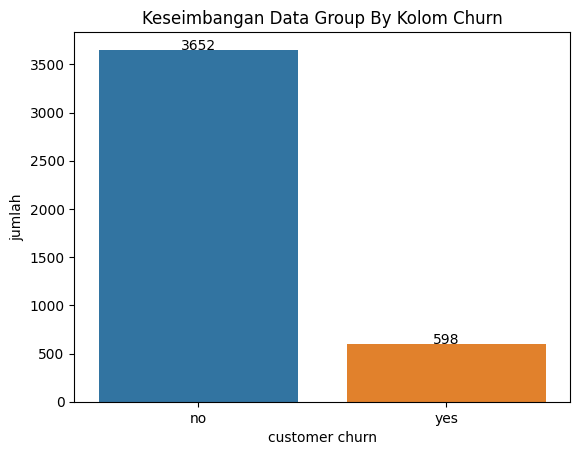

In [10]:
# memeriksa keseimbangan data terhadap target kolom secara visual
fig = sns.countplot(x=data_train['churn'])
fig.set(xlabel='customer churn', ylabel='jumlah',
        title='Keseimbangan Data Group By Kolom Churn')
i=0
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x()+p.get_width()/2., height + 1.5,
        data_train.groupby(['churn']).size()[i],ha="center")
    i += 1
plt.show()

terlihat data sangat tidak seimbang jadi harus di seimbangkan dalam preprocessing data

<Axes: xlabel='area_code', ylabel='count'>

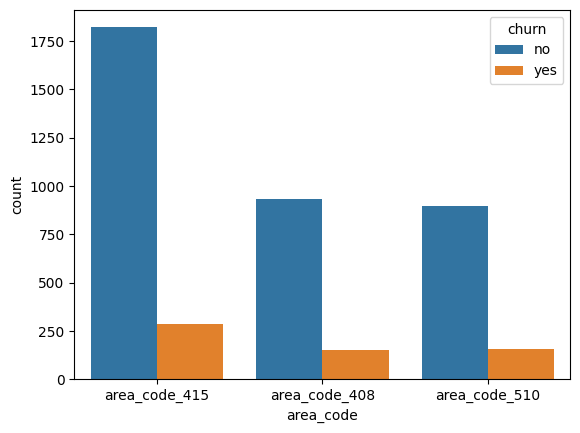

In [ ]:
# memeriksa hubungan kolom area_code dengan churn
sns.countplot(data=data_train, x='area_code', hue='churn')

diperoleh dari grafik bahwa area_code menunjukan data customer churn dan tidak churn dari yang terbanyak ke terendah sehingga terdapat hubungan yang signifikan

<Axes: xlabel='state', ylabel='count'>

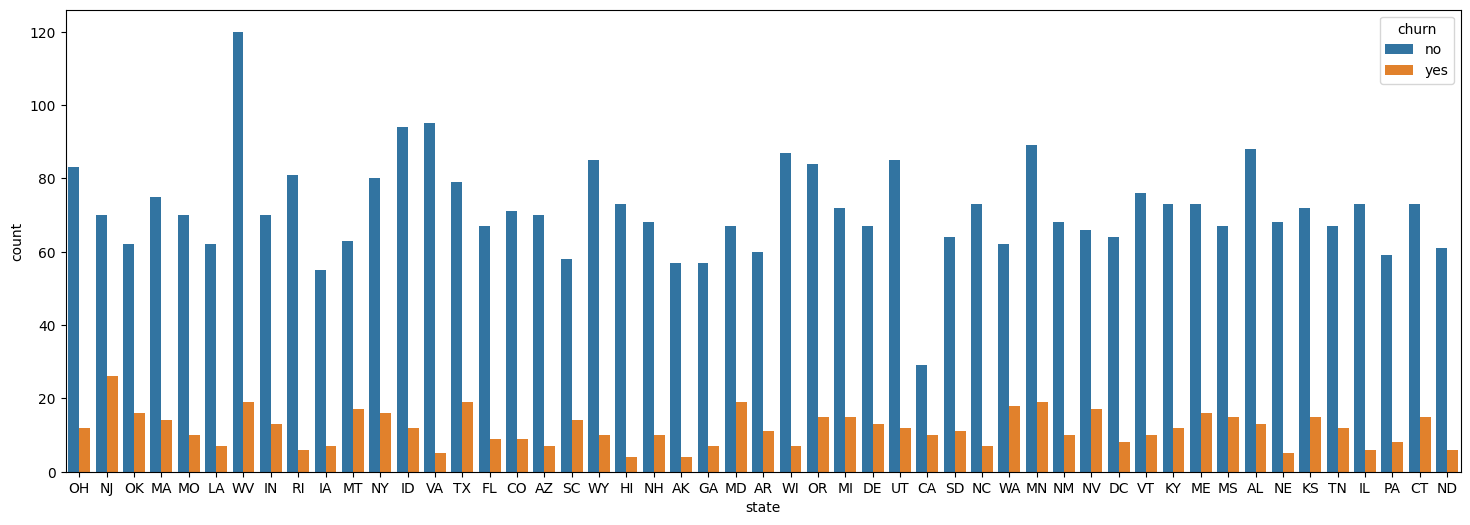

In [11]:
# memeriksa hubungan kolom area_code dengan churn
plt.figure(figsize = (18, 6))
sns.countplot(data=data_train, x='state',hue='churn')

dari grafik terlihat data churn memilki hubungan dengan state walau persebarannya variatif dan polanya tidak teratur. karena datanya terlalu banyak jika di onehot encoding, maka kolom state dapat di label encoding

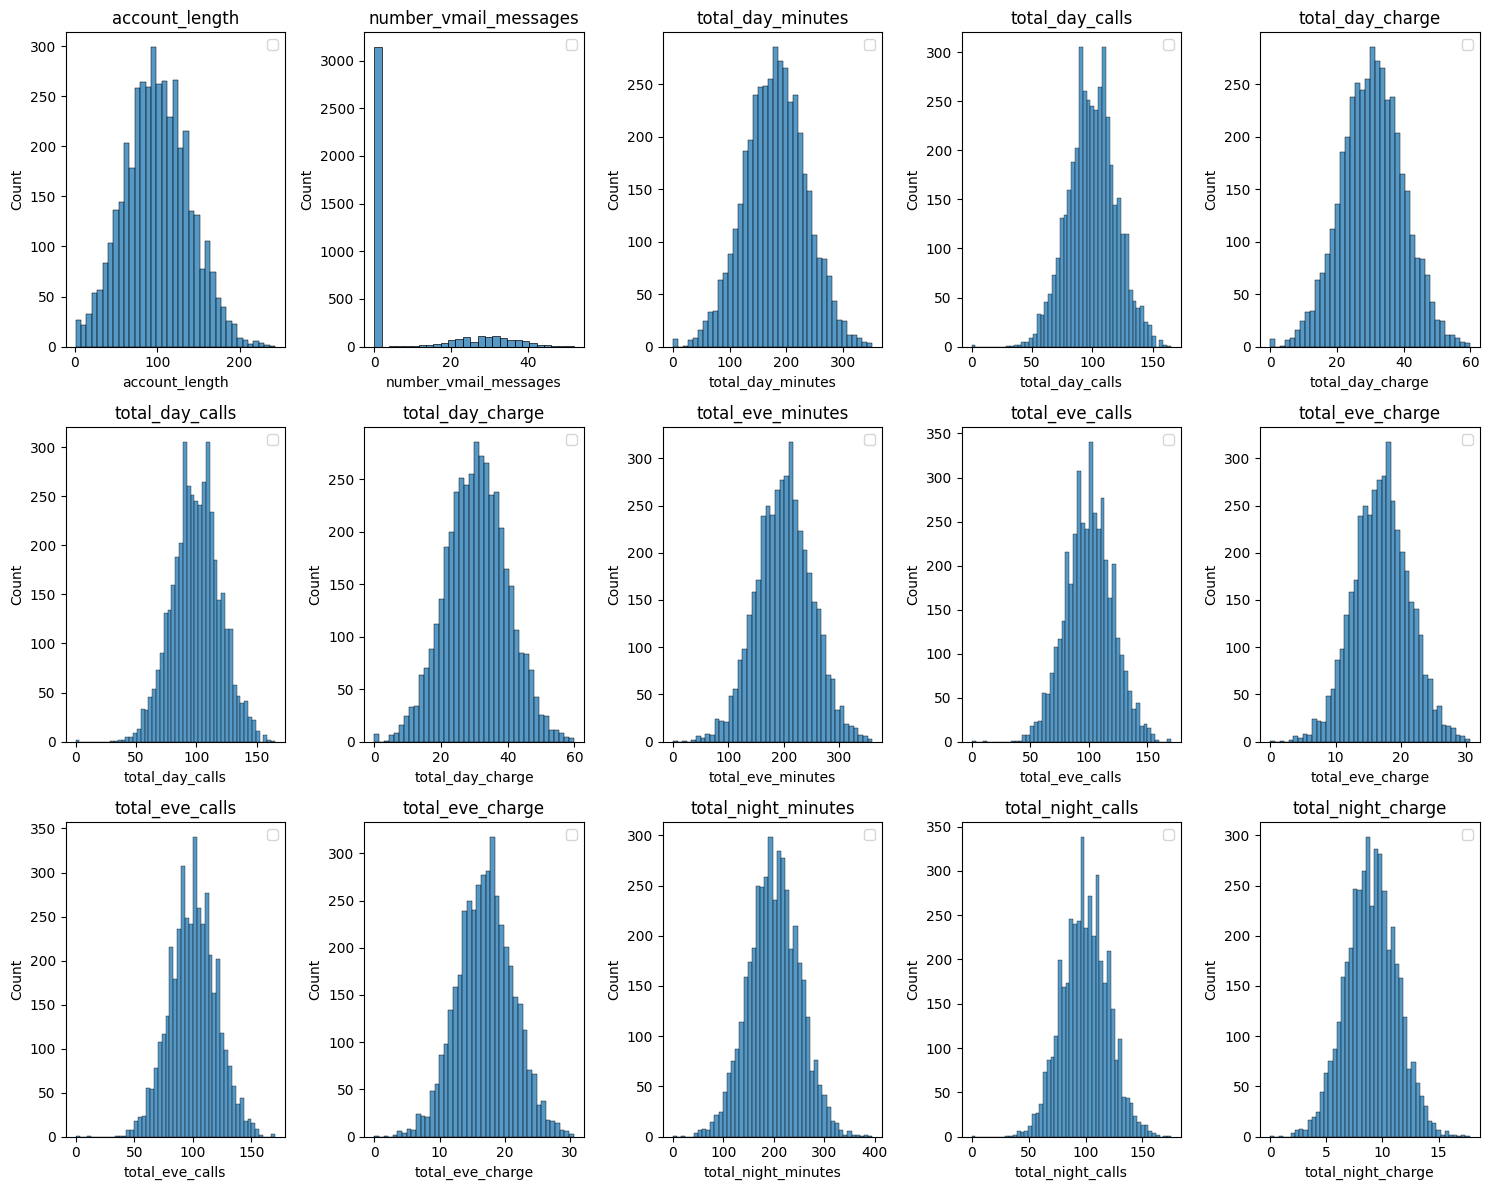

In [12]:
# memeriksa distribusi ditiap kolom numerikal
col = numerikal

fig,axis=plt.subplots(3,5,figsize=(15,12))

for r in range(0,3):
    for c in range(0,5):
        i=r*3+c
        ax=axis[r][c]
        sns.histplot(data_train[col[i]], ax=ax)
        ax.set_title(col[i])
        ax.legend(loc='upper right')

plt.tight_layout()

kolom data numerikal hampir berdistribusi normal semua sehingga dapat digunakan untuk memdevelop model

## Data Preprocessing
  - tranform data
  - balancing data
  - finalisasi dataset

In [13]:
# mengambil value unik di kolom area_code
data_train['area_code'].unique()

array(['area_code_415', 'area_code_408', 'area_code_510'], dtype=object)

In [14]:
# transform data kategorikal ke bentuk numerik 
labelencoder = LabelEncoder()

data_train = pd.get_dummies(data_train, columns=kategorikal)

data_train['area_code'] = data_train['area_code'].map({ 
    'area_code_510': 0, 'area_code_408': 1, 'area_code_415':2
})

data_train['churn'] = labelencoder.fit_transform(data_train['churn'])

data_train['state'] = labelencoder.fit_transform(data_train['state'])



In [18]:
# cek hasil encoding
data_train[['state','area_code', 'churn', 
            'international_plan_no',	'international_plan_yes',
            'voice_mail_plan_no',	'voice_mail_plan_yes']]

,state,area_code,churn,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes
0,35,2,0,1,0,0,1
1,31,2,0,1,0,1,0
2,35,1,0,0,1,1,0
3,36,2,0,0,1,1,0
4,19,0,0,1,0,0,1
...,...,...,...,...,...,...,...
4245,26,2,0,1,0,1,0
4246,49,1,0,1,0,1,0
4247,27,1,0,1,0,1,0
4248,11,1,0,1,0,0,1


In [29]:
#@title Jalankan Forms Ini Untuk Normalisasi Data
# normalisasi data 
name = numerikal
for i in range(len(numerikal)):
  data_train[name[i]] = MinMaxScaler().fit_transform(data_train[name[i]].values.reshape(len(data_train), 1))


In [30]:
#@title Jalankan Form Ini Untuk Standarisasi Data
# standarisasi data
data_train[numerikal] = StandardScaler().fit_transform(data_train[numerikal].values)

In [31]:
# balancing data
balance = SMOTE()

# memisahkan data train menjadi X_res, Y_res setelah dibalancing
X_res, Y_res = balance.fit_resample(data_train, data_train[target])

print('Sebelum resampling: ')
print(data_train.groupby(['churn']).size())
print('Hasil resampling: ')
X_res.groupby('churn').size()

Sebelum resampling: 
churn
0    3652
1     598
dtype: int64
Hasil resampling: 


churn
0    3652
1    3652
dtype: int64

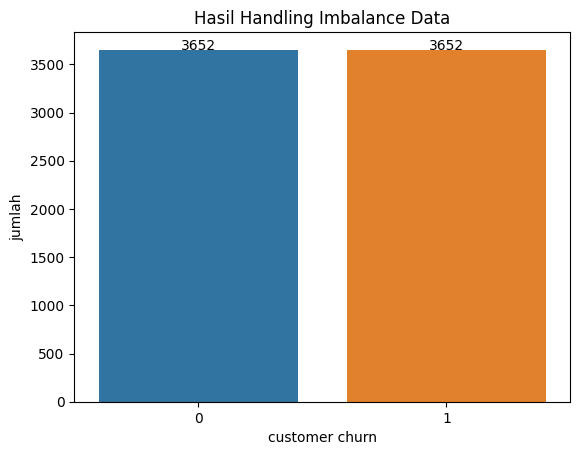

In [32]:
# visualisasi hasil handling imbalance data
viz = sns.countplot(x=X_res['churn'])
viz.set(xlabel='customer churn', ylabel='jumlah',
        title='Hasil Handling Imbalance Data')
i=0
for p in viz.patches:
    height = p.get_height()
    viz.text(p.get_x()+p.get_width()/2., height + 1.5,
        X_res['churn'].value_counts()[i],ha="center")
    i += 1
plt.show()

In [33]:
# mencari korelasi antar kolom
cor_matrix = X_res.corr()
cor_matrix

,state,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,...,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes
state,1.000000,0.023848,-0.047821,-0.015649,0.046145,-0.025293,0.046151,0.028590,0.016735,0.028606,...,0.000951,0.008304,0.044019,0.008347,-0.041363,-0.000444,-0.003170,-0.002802,0.033320,-0.014289
account_length,0.023848,1.000000,0.000827,0.022913,-0.007868,0.030312,-0.007868,-0.021046,0.021828,-0.021041,...,-0.035593,-0.005052,0.009573,-0.005094,0.002178,0.017474,-0.016658,0.022491,-0.036628,0.021043
area_code,-0.047821,0.000827,1.000000,0.019321,-0.036395,0.028440,-0.036397,-0.072339,-0.011449,-0.072355,...,0.016958,0.017449,0.038957,0.017425,-0.046794,-0.156670,0.084920,-0.024343,-0.022458,0.036284
number_vmail_messages,-0.015649,0.022913,0.019321,1.000000,-0.110850,-0.002758,-0.110853,-0.050633,0.013633,-0.050605,...,-0.030511,0.002833,0.030224,0.002859,0.006677,-0.192832,0.021298,0.019887,-0.919820,0.918643
total_day_minutes,0.046145,-0.007868,-0.036395,-0.110850,1.000000,-0.006694,1.000000,0.145877,-0.011928,0.145862,...,0.090664,-0.006494,0.038514,-0.006304,-0.200150,0.293281,-0.045978,-0.029523,0.122177,-0.106964
total_day_calls,-0.025293,0.030312,0.028440,-0.002758,-0.006694,1.000000,-0.006692,0.035270,0.003475,0.035274,...,-0.002293,0.002012,0.010833,0.001926,0.009944,0.018167,0.001813,-0.012683,-0.002913,-0.013558
total_day_charge,0.046151,-0.007868,-0.036397,-0.110853,1.000000,-0.006692,1.000000,0.145878,-0.011926,0.145862,...,0.090662,-0.006500,0.038517,-0.006310,-0.200153,0.293265,-0.045975,-0.029523,0.122182,-0.106964
total_eve_minutes,0.028590,-0.021046,-0.072339,-0.050633,0.145877,0.035270,0.145878,1.000000,-0.002392,1.000000,...,0.015132,-0.007864,0.035395,-0.007765,-0.099125,0.132974,0.010102,-0.016811,0.060612,-0.046264
total_eve_calls,0.016735,0.021828,-0.011449,0.013633,-0.011928,0.003475,-0.011926,-0.002392,1.000000,-0.002364,...,0.025818,-0.053200,0.013108,-0.053214,0.004246,-0.010340,0.022784,-0.017708,-0.004401,0.007153
total_eve_charge,0.028606,-0.021041,-0.072355,-0.050605,0.145862,0.035274,0.145862,1.000000,-0.002364,1.000000,...,0.015133,-0.007878,0.035410,-0.007779,-0.099120,0.132964,0.010120,-0.016833,0.060590,-0.046243


(7304, 22)


<Axes: >

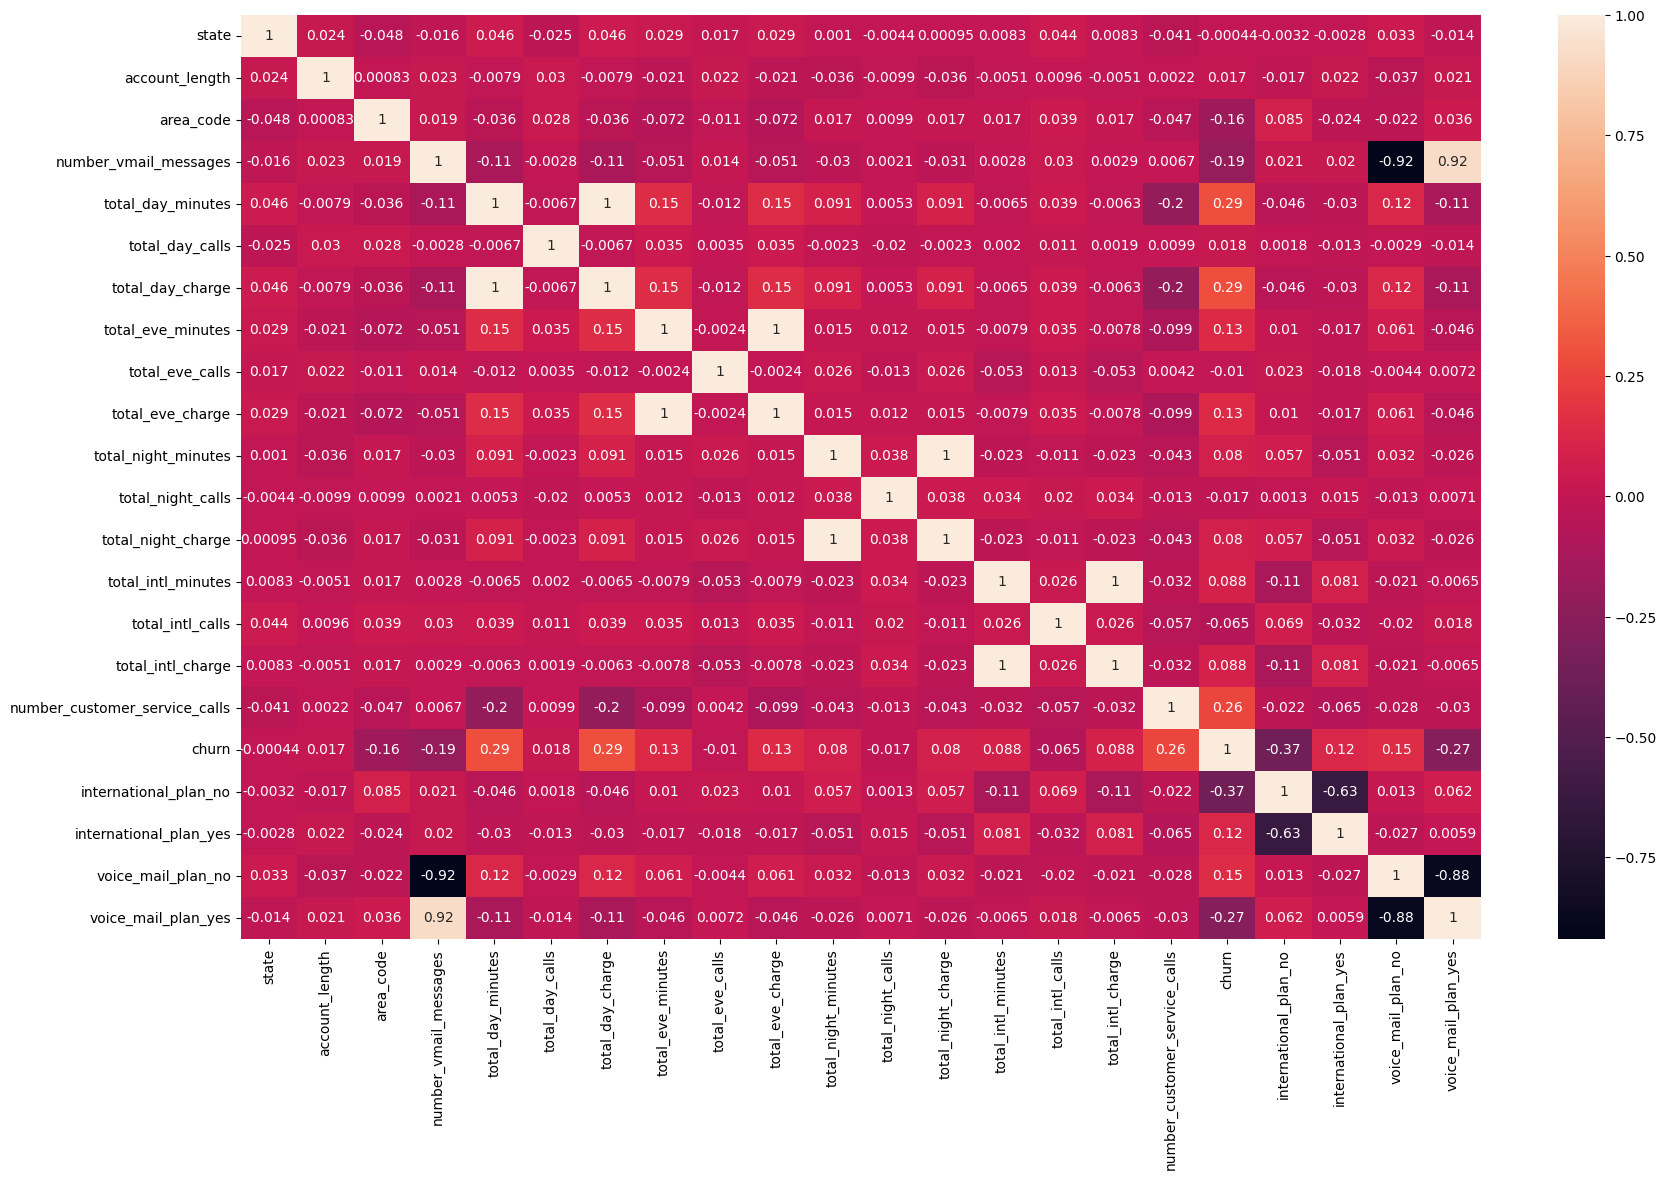

In [34]:
# mencari korelasi antar kolom secara visual
print(X_res.shape)
plt.figure(figsize = (20, 12))
sns.heatmap(X_res.corr(), annot=True)

perhatikan pada kolom churn, telihat korelasi kolom churn dengan kolom lainnya tidak ada yang lebih dari 0.90 sehingga semua kolom bisa dipakai

In [35]:
# Membuat data train final untuk training model
Y = Y_res
X = X_res.drop(target, axis=1)

## Developing model
  - training model
  - evaluasi model
  - saving model

In [36]:
# memisahkan data train dan test untuk developing model
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,
                                                    random_state= 32)


In [37]:
# training model descision tree
tree = DecisionTreeClassifier()
tree.fit(X_train, Y_train)

# training model random forest
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)

# klasifikasi model menggunakan data X_test
tree_pred = tree.predict(X_test)
print('Prediksi decision tree: ')
print(tree_pred)

# klasifikasi model menggunakan data X_test
rf_pred = rf.predict(X_test)
print('Prediksi random forest: ')
print(rf_pred)

<ipython-input-37-5428127855f0>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, Y_train)


Prediksi decision tree: 
[1 0 1 ... 1 1 1]
Prediksi random forest: 
[1 0 1 ... 1 1 1]


In [26]:
# melihat array data untuk validasi hasil prediksi
print('Y_test untuk validasi hasil:')
print(Y_test.values.ravel())

Y_test untuk validasi hasil:
[1 0 1 ... 1 1 1]


In [38]:
# Evaluasi model dengan confusion matrix
print('Confusion Matrix dari Decision Tree:')
print(confusion_matrix(Y_test.values.ravel(), tree_pred))
print('Confusion Matrix dari Random Forest:')
print(confusion_matrix(Y_test.values.ravel(), rf_pred))

Confusion Matrix dari Decision Tree:
[[704  66]
 [ 42 649]]
Confusion Matrix dari Random Forest:
[[737  33]
 [ 25 666]]


In [39]:
# Evaluasi model menggunakan classification report
print('Classification Report dari Decision Tree:')
print(classification_report(Y_test, tree_pred))
print('Classification Report dari Random Forest:')
print(classification_report(Y_test, rf_pred))

Classification Report dari Decision Tree:
              precision    recall  f1-score   support

           0       0.94      0.91      0.93       770
           1       0.91      0.94      0.92       691

    accuracy                           0.93      1461
   macro avg       0.93      0.93      0.93      1461
weighted avg       0.93      0.93      0.93      1461

Classification Report dari Random Forest:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       770
           1       0.95      0.96      0.96       691

    accuracy                           0.96      1461
   macro avg       0.96      0.96      0.96      1461
weighted avg       0.96      0.96      0.96      1461



dari 2 evaluasi tersebut dapat disimpulkan model dengan random forest memiliki akurasi yang lebih baik dan bias yang lebih sedikit. jadi model dengan random forest yang akan dipilih.

In [40]:
# saving model terbaik
import pickle

filename = 'model.sav'
pickle.dump(rf, open(filename, 'wb'))

## Melakukan prediksi dengan data yang belum terlihat

In [49]:
#@title Jalankan fungsi ini untuk pipeline preprocessing data baru
# membuat fungsi untuk memproses data baru dengan model yang di normalisasi
def preprocessing (df):

  # mengkategorikan kolom data
  ktg = ['international_plan', 'voice_mail_plan']
  ktg2 = ['area_code']
  drop = ['id']
  long_ktg = ['state']
  num = [x for x in df.columns if x not in ktg + ktg2 + long_ktg + 
             drop]

  # drop kolom id
  df = df.drop(drop, axis=1)

  # label encoding
  df['state'] = labelencoder.fit_transform(df['state'])
  df['area_code'] = df['area_code'].map({ 
    'area_code_510': 0, 'area_code_408': 1, 'area_code_415':2})

  # onehot encoding
  df = pd.get_dummies(df, columns=ktg)

  # normalisasi data
  for i in range(len(num)):
    df[num[i]] = MinMaxScaler().fit_transform(df[num[i]].values.reshape(len(df), 1))
  
    # standarisasi data
  df[num] = StandardScaler().fit_transform(df[num].values)

  return df


In [50]:
# membaca data yang akan diprediksi
new_data = pd.read_csv('/content/Data Test.csv')
print(new_data.shape)
new_data.head()

(750, 20)


,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [51]:
# membaca data yang akan diprediksi
new_data = pd.read_csv('/content/Data Test.csv')

# melakukan preprosesing data baru agar siap dimasukkan ke model
input = preprocessing(new_data)
input.shape
input.head()

,state,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,...,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes
0,16,0.696065,2,1.172240,1.590391,0.470870,1.590686,-0.112333,-0.065790,-0.112140,...,-0.488757,0.874772,-0.106243,-0.613702,-0.106976,-0.497639,1,0,0,1
1,1,0.444001,0,-0.599015,0.806892,-0.138101,0.807063,0.332531,0.037545,0.332287,...,0.919514,0.085085,-1.442710,0.625821,-1.445297,-1.281734,0,1,1,0
2,12,-0.967554,2,-0.599015,-1.122731,-1.559032,-1.122705,1.993104,-1.254136,1.992682,...,-0.071491,0.067824,1.013500,0.625821,1.017213,1.854646,1,0,1,0
3,46,-0.186157,0,-0.599015,0.192494,0.673860,0.192544,0.286511,0.554217,0.287167,...,1.075989,-1.360517,-0.792537,-0.613702,-0.789520,1.070551,1,0,1,0
4,29,1.855557,2,-0.599015,-1.055091,-1.254547,-1.055285,1.415931,0.605885,1.415153,...,0.763040,0.991283,1.880397,0.212647,1.887122,1.070551,1,0,1,0


In [52]:
# memanggil model untuk klasifikasi data baru
file_model = '/content/model.sav'
loaded_model = pickle.load(open(file_model, 'rb'))

# memprediksi customer churn dari data baru dengan model
prediksi = pd.DataFrame(loaded_model.predict(input), columns=['churn'])
prediksi = prediksi.replace([0,1],['no','yes'])
prediksi.head()

,churn
0,no
1,no
2,yes
3,no
4,no


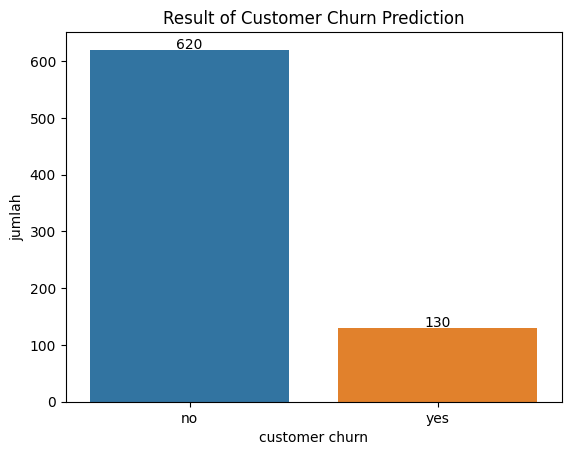

In [53]:
# visualisasi data hasil prediksi
viz = sns.countplot(x=prediksi['churn'])
viz.set(xlabel='customer churn', ylabel='jumlah',
        title='Result of Customer Churn Prediction')
i=0
for p in viz.patches:
    height = p.get_height()
    viz.text(p.get_x()+p.get_width()/2., height + 1.5,
        prediksi['churn'].value_counts()[i],ha="center")
    i += 1
plt.show()

In [47]:
# menambahkan hasil prediksi ke data terbaru
churn = pd.DataFrame(prediksi, columns=['churn'])

hasil_prediksi_data_test = pd.concat([new_data,churn], axis=1)
hasil_prediksi_data_test.head()


,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,no
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,...,76,26.11,203.0,99,9.14,13.1,6,3.54,4,yes
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,...,111,18.55,129.6,121,5.83,8.1,3,2.19,3,no
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,...,112,23.55,250.7,115,11.28,15.5,5,4.19,3,no


In [48]:
# menyimpan hasil data test dengan prediksinya
hasil_prediksi_data_test.to_csv('hasil_prediksi_data_test.csv')